<a href="https://colab.research.google.com/github/JuliustheCreator/youtube-visualization/blob/main/analysis/youtube_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [14]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from google.colab import files

# **Cleaning Data**


---


The data is cleaned using Pandas.

In [12]:
#Reading in Data
url = 'https://raw.githubusercontent.com/JuliustheCreator/youtube-visualization/main/main/data/topSubscribed.csv'
df = pd.read_csv(url)

#Cleaning Data by removing outliers or weird formatting
df = df.dropna().replace("https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels", "Misc")
df = df.dropna().replace(1970, "2005")

for col in ["Subscribers", "Video Views", "Video Count"]: #Removing the commas in each str
  df[col] = df[col].str.replace(",", "")

for col in ["Video Count"]: #Casting video count to int and dividing by 1000
  df[col] = df[col].astype(int)
  df[col] = df[col] / 1000

for col in ["Subscribers", "Video Views"]: #Casting each element to integer then dividing by a million when needed
  df[col] = df[col].astype(int)
  df[col] = df[col] / 1000000

for col in ["Started"]: #Casting each element to integer 
  df[col] = df[col].astype(int)
df.head(100)

#Creating Age Column
df['Age'] = 2023 - df['Started']

#Exporting Cleaned Data to use in Regression Model
with open("cleaned_data.pkl", "wb") as f:
    pickle.dump(df, f)

files.download("cleaned_data.pkl")

# Displaying Dataset
print(df.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Rank             Youtube Channel  Subscribers    Video Views  Video Count  \
0     1                    T-Series        234.0  212900.271553       18.515   
1     2              YouTube Movies        161.0       0.000000        0.000   
2     3  Cocomelon - Nursery Rhymes        152.0  149084.178448        0.846   
3     4                   SET India        150.0  137828.094104      103.200   
4     5                     MrBeast        128.0   21549.128785        0.733   

           Category  Started  Age  
0             Music     2006   17  
1  Film & Animation     2015    8  
2         Education     2006   17  
3             Shows     2006   17  
4     Entertainment     2012   11  


# **Displaying Advanced Statistics**


---


We display the mean, median, variance, and standard deviation, for the channels' subscribers, video views, video count, and age (as of 2023)

In [ ]:
#Number of Subscribers
meanSubs = df["Subscribers"].mean()
medianSubs = df["Subscribers"].median()
varianceSubs = df["Subscribers"].var()
stdSubs = df["Subscribers"].std()
print("The average amount of subscribers (in millions) is: ", meanSubs)
print("The median amount of subscribers (in millions) is: ", medianSubs)
print("The variance of subscribers (in millions) is: ", varianceSubs)
print("The standard deviation of subscribers (in millions) is: ", stdSubs, "\n")

#Video Views
meanViews = df["Video Views"].mean()
medianViews = df["Video Views"].median()
varianceViews = df["Video Views"].var()
stdViews = df["Video Views"].std()
print("The average amount of video views (in millions) is: ", meanViews)
print("The median amount of video views (in millions) is: ", medianViews)
print("The variance of video views (in millions) is: ", varianceViews)
print("The standard deviation of video views (in millions) is: ", stdViews, "\n")

#Video Count
meanVidCount = df["Video Count"].mean()
medianVidCount = df["Video Count"].median()
varianceVidCount = df["Video Count"].var()
stdVidCount = df["Video Count"].std()
print("The average amount of video count (in thousands) is: ", meanVidCount)
print("The median amount of video count (in thousands) is: ", medianVidCount)
print("The variance of video count (in thousands) is: ", varianceVidCount)
print("The standard deviation of video count (in thousands) is: ", stdVidCount, "\n")

#Age
meanAge = (2022 - round(df["Started"].mean()))
medianAge = (2022 - round(df["Started"].median()))
varianceAge = df["Started"].var()
stdAge = df["Started"].std()
print("The average age is: ", meanAge)
print("The median age is: ", medianAge)
print("The variance of the ages is: ", varianceAge)
print("The standard deviation of the ages is: ", stdAge, "\n")


The average amount of subscribers (in millions) is:  21.581400000000002
The median amount of subscribers (in millions) is:  16.6
The variance of subscribers (in millions) is:  276.4093634034034
The standard deviation of subscribers (in millions) is:  16.625563551453027 

The average amount of video views (in millions) is:  9994.912409733999
The median amount of video views (in millions) is:  6723.360159
The variance of video views (in millions) is:  169141923.65293387
The standard deviation of video views (in millions) is:  13005.457456503937 

The average amount of video count (in thousands) is:  9.416228
The median amount of video count (in thousands) is:  0.896
The variance of video count (in thousands) is:  1036.2546295856018
The standard deviation of video count (in thousands) is:  32.190909113996796 

The average age is:  9
The median age is:  9
The variance of the ages is:  15.134493493493492
The standard deviation of the ages is:  3.890307634814179 



# **Visualization**



---


### **Aggregate Video Views per Category**


---
We visualize the aggregate video views for each category through matplotlib, creating a bar chart.


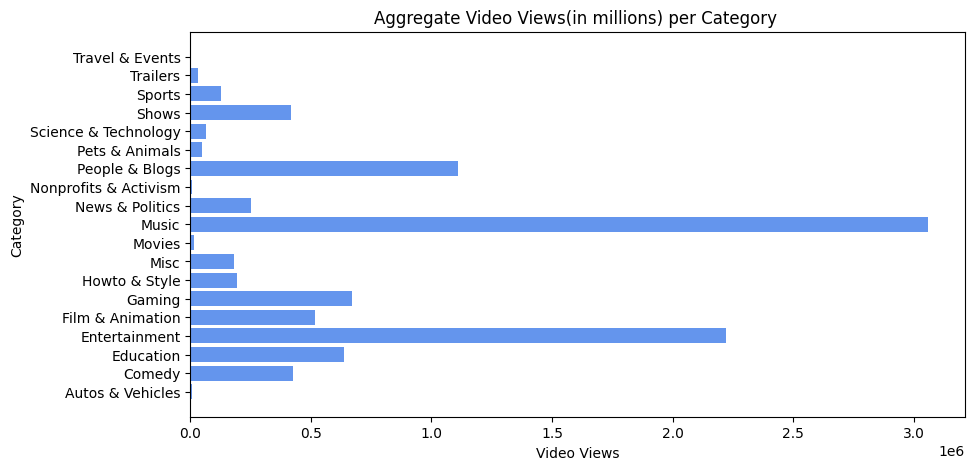

In [ ]:
#Grouping and aggregating
groupedByCat = df.groupby(["Category"], as_index= False)["Video Views"].sum()
#print("Here's the genres grouped by category\n", groupedByCat)

#Plotting
plt.figure(figsize = (10, 5))

plt.barh(groupedByCat['Category'], groupedByCat['Video Views'], color = 'cornflowerblue')

plt.xlabel("Video Views")
plt.ylabel("Category")
plt.title("Aggregate Video Views(in millions) per Category ")
plt.show()


This is a scatterplot of the views (y) plotted against the age (x):

Text(0, 0.5, 'Views(in millions)')

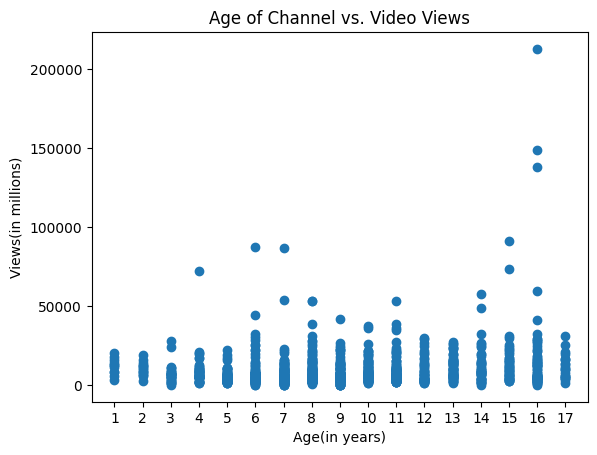

In [ ]:
for col in ["Started"]: #Converting year of channel creation to how old the channel is
  df[col] = df[col].astype(int)
  df[col] = 2022 - df[col]

#Scatter plot Graphing
plt.scatter(df["Started"], df["Video Views"])
plt.title("Age of Channel vs. Video Views")

plt.xticks(range(1,18))
plt.xlabel("Age(in years)")
plt.ylabel("Views(in millions)")


This is a line graph of the rank (y) plotted against views (x):

This is a pie graph of the views for each category against total views on the site: